In [1]:
# Importando as bibliotecas

from sklearn import datasets
import sklearn as sk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [24]:
# Importando o dataset

df_iris = pd.read_csv('iris.data',names=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','classes'])
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),classes
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
df_iris.groupby('classes').describe().T

classes                  Iris-setosa  Iris-versicolor  Iris-virginica
sepal length (cm) count    50.000000        50.000000       50.000000
                  mean      5.006000         5.936000        6.588000
                  std       0.352490         0.516171        0.635880
                  min       4.300000         4.900000        4.900000
                  25%       4.800000         5.600000        6.225000
                  50%       5.000000         5.900000        6.500000
                  75%       5.200000         6.300000        6.900000
                  max       5.800000         7.000000        7.900000
sepal width (cm)  count    50.000000        50.000000       50.000000
                  mean      3.418000         2.770000        2.974000
                  std       0.381024         0.313798        0.322497
                  min       2.300000         2.000000        2.200000
                  25%       3.125000         2.525000        2.800000
                  50%       3.400000         2.800000        3.000000
                  75%       3.675000         3.000000        3.175000
                  max       4.400000         3.400000        3.800000
petal length (cm) count    50.000000        50.000000       50.000000
                  mean      1.464000         4.260000        5.552000
                  std       0.173511         0.469911        0.551895
                  min       1.000000         3.000000        4.500000
                  25%       1.400000         4.000000        5.100000
                  50%       1.500000         4.350000        5.550000
                  75%       1.575000         4.600000        5.875000
                  max       1.900000         5.100000        6.900000
petal width (cm)  count    50.000000        50.000000       50.000000
                  mean      0.244000         1.326000        2.026000
                  std       0.107210         0.197753        0.274650
                  min       0.100000         1.000000        1.400000
                  25%       0.200000         1.200000        1.800000
                  50%       0.200000         1.300000        2.000000
                  75%       0.300000         1.500000        2.300000
                  max       0.600000         1.800000        2.500000

In [25]:
# Identificando se possui Missing's

df_iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
classes              0
dtype: int64

In [26]:
# Identificando a dispersão dos dados

fig = px.scatter_3d(df_iris, x='sepal length (cm)', y='sepal width (cm)', z='petal width (cm)',color='classes')
fig

In [27]:
df_iris['classes'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: classes, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [32]:
x = df_iris[df_iris.columns.difference(['classes'])].values
y = df_iris['classes'].values

In [33]:
model = RandomForestClassifier(criterion='entropy',max_depth=6, n_jobs=5)
model.fit(x,y)

RandomForestClassifier(criterion='entropy', max_depth=6, n_jobs=5)

In [34]:
for feature, importance in zip(df_iris, model.feature_importances_):
    print(f'{feature}: {importance:.2f}')

sepal length (cm): 0.42
sepal width (cm): 0.47
petal length (cm): 0.09
petal width (cm): 0.02


In [98]:
sns.heatmap(df_iris.corr(), annot=True,cmap="Blues_r")

TypeError: unsupported operand type(s) for |: 'float' and 'bool'

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: classes, Length: 150, dtype: int32

In [47]:
aval = cross_val_score(model, x, y, scoring='accuracy',cv=5)
np.mean(aval).round(2)

0.96

In [55]:
# Validando com uma nova entrada de dados

nova_iris = [[1.6,0.5,5.0,3.6]]

y_pred = model.predict(nova_iris)
print(y_pred)

array(['Iris-setosa'], dtype=object)

In [48]:
from sklearn.metrics import confusion_matrix

In [56]:
# Realizando Label encoding na variável classe para analisar a matrix de confusão

from sklearn import preprocessing

labelencoder = preprocessing.LabelEncoder()

df_iris['classes'] = labelencoder.fit_transform(df_iris['classes'])
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),classes
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


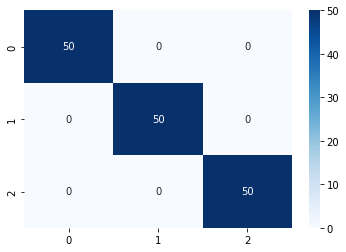

In [57]:
# Matrix de Counfusão

y_pred = model.predict(x)

conf_mat = confusion_matrix(y, y_pred)
sns.heatmap(conf_mat, annot=True, cmap='Blues', )
plt.show()

In [58]:
nova_iris = [[7.0, 3.2, 5.2, 2.4]]
nova = model.predict(nova_iris)
print(nova)

['Iris-virginica']
